**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [27]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s |= i**2
s

123

In [35]:
from functools import reduce

n = 10
s = 10
reduce(lambda x,y: x|y,map(lambda x: x**2,(filter(lambda i: i%2, range(n)))),s)

123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

In [75]:
import toolz as tz
import toolz.curried as c
from functools import partial

res = tz.pipe(range(n),c.filter(lambda i:i%2),c.map(lambda x:x**2),c.reduce(lambda x,y:x|y),c.pipe(lambda x: x|s))
res

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [3]:
import numpy as np
np.random.seed(123)
l = 1.0
d = 2.0
centers = np.random.uniform(0,d/2,1000000)
orientations = np.random.uniform(0, np.pi/2,1000000)
prob = (l/2*np.sin(orientations)>=centers).mean()
pi = 2*l / (prob*d)

print (pi)

3.1432998991


**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [84]:
def simpsons(f,a,b,n=100):
    x = np.linspace(a,b,n)
    even = np.arange(2,n-1,2)
    odd = np.arange(1,n,2)
    return ((b-a)/n)/3*(f(a)+func(x[even]).sum()*2+func(x[odd]).sum()*4+f(b))
      
def func(x):
    return 1/np.sqrt(2*np.pi)*np.e**(-0.5*(x**2))

simpsons(func,-1,1)

0.68068571715953907

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./figs/automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

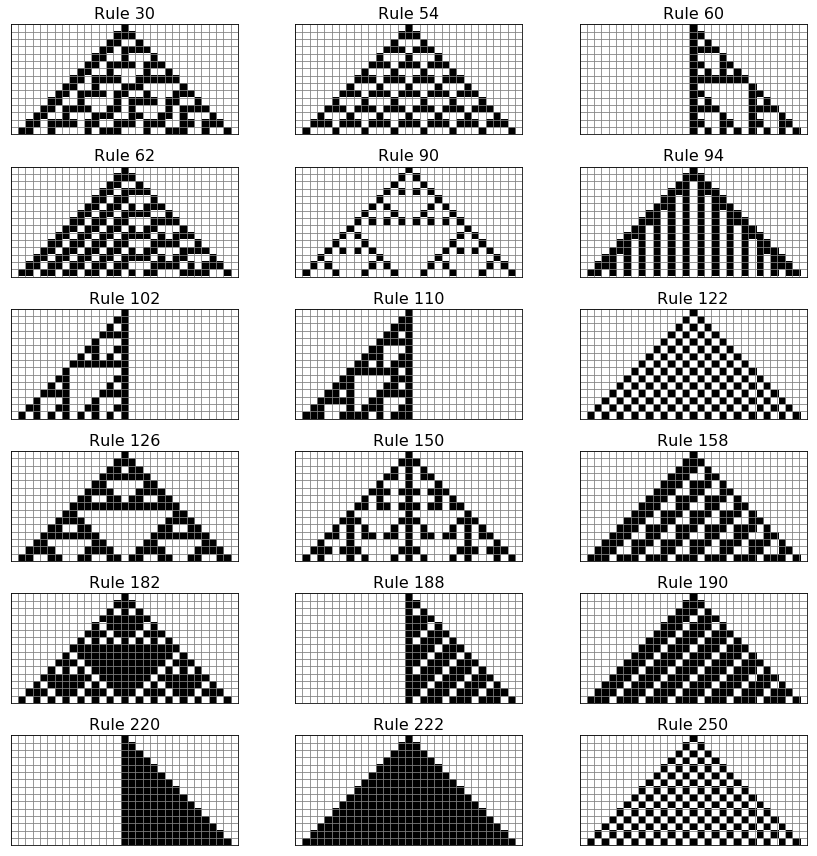

In [123]:
import matplotlib.pyplot as plt
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
ncols = 31
niter = 15

def get_rule(rule):
    keys = tz.pipe(range(8),c.map(lambda x:'{0:03b}'.format(x)))
    values = tz.pipe('{0:08b}'.format(rule)[::-1])
    rules = {k:v for k,v in zip(keys,values)}
    return rules

def get_matrix(rule,niter,ncols):
    matrix = np.zeros((1,ncols),dtype=int)
    matrix[0][ncols//2]=1
    r = get_rule(rule)
    for i in range(niter-1):
        next = np.zeros((1,ncols),dtype=int)
        for j in range(1,ncols-1):
            s = str(matrix[i][j-1])+str(matrix[i][j])+str(matrix[i][j+1])
            next[0][j] = int(r[s])
        matrix = np.r_[matrix,next]
    return matrix

def make_plots(rules, niter, ncols):
    fig, axes = plt.subplots(6, 3, figsize=(12,12))
    for i, ax in enumerate(axes.ravel(), 0):
        matrix = get_matrix(rules[i],niter,ncols)
        ax.imshow(matrix,cmap='Greys')
        ax.set_title('Rule %d' % rules[i], fontsize=16)
        ax.set_xticks(np.arange(0, ncols)-0.5)
        ax.set_yticks(np.arange(0, niter)-0.5)
        ax.grid(color='Grey')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
    plt.tight_layout()

    
make_plots(rules,niter,ncols)